In [211]:
import matplotlib.pyplot as plt 
import matplotlib.image  as pltimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True



In [212]:
from PIL import Image, UnidentifiedImageError
import os

root_dir = '/kaggle/working/crop-cleaned'  # Replace if needed
broken_files = []

for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Validate image
        except (UnidentifiedImageError, OSError, ValueError):
            print("Removing broken image:", file_path)
            broken_files.append(file_path)
            os.remove(file_path)

print(f"\n✅ Removed {len(broken_files)} corrupted/bad images.")


Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight37_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight453_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight830_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight746_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight913_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight590_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight98_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_blight/leaf blight667_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_healthy/healthy88_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_healthy/healthy18_.jpg
Removing broken image: /kaggle/working/crop-cleaned/Maize_leaf_beetle/leaf beetle208_.jpg
Removing broken image: /kaggle

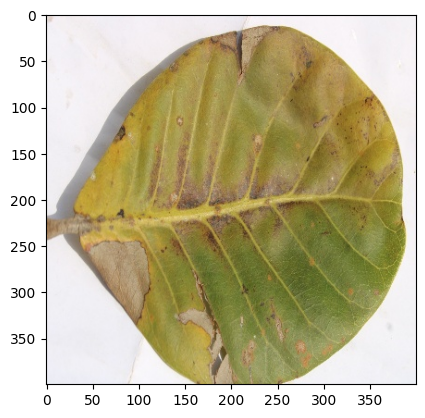

In [213]:
image =  pltimg.imread("/kaggle/input/crop-pest-and-disease-detection/Cashew anthracnose/anthracnose1000_.jpg")
plt.imshow(image)

In [214]:
image.shape

(400, 400, 3)

In [215]:
#ImageDataGenerator used for scaling images 

datagen = ImageDataGenerator(
    rescale = 1.0/255, #Normalize pixel values to [0,1]
    rotation_range=40, #Randomly rotate images
    width_shift_range=0.2,#Randomly shift images horizontally
    height_shift_range=0.2, #Randomly shift images vertically
    shear_range=0.2, #Randomly shear images
    zoom_range=0.2, #Randomly zoom images
    horizontal_flip=True, #Randomly flip images
    fill_mode="nearest",
    validation_split = 0.2
)




In [216]:
folder = "/kaggle/working/crop-cleaned"


## Using Flow from Directory

In [217]:
training_data = datagen.flow_from_directory(
    folder,
    target_size = (28,28),
    batch_size = 32,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

Found 5023 images belonging to 22 classes.


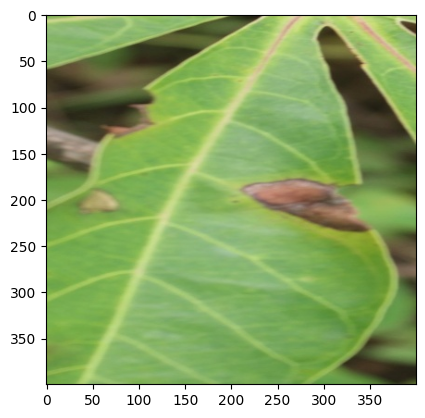

In [218]:
image =  pltimg.imread("/kaggle/input/crop-pest-and-disease-detection/Cassava brown spot/brown spot1003_.jpg")
plt.imshow(image)

In [219]:
image1.shape

(400, 400, 3)

In [220]:
model =  Sequential()
model.add(Input(shape=(28,28,3)))
model.add(Conv2D(32,(3,3),activation="relu"))
# model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = "relu"))
# model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = "relu"))
# model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(22,activation="softmax"))

# Example with batch normalization
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=None, input_shape=(150, 150, 3)))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.Activation('relu'))

In [221]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

training_data = datagen.flow_from_directory(
    folder,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    seed=42,
    subset='training'
)

validation_data = datagen.flow_from_directory(
    folder,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    seed=42,
    subset='validation'
)


Found 20147 images belonging to 22 classes.
Found 5023 images belonging to 22 classes.


In [222]:
#validation = datagen.flow_from_directory(
  #  folder,
  #  target_size=(28,28),
  #  class_mode = "categorical",
  #  color_mode = "rgb",
  #  subset = "validation"
#)

In [223]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [224]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │       3,964,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 22)                  │             726 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,061,046 (15.49 MB)

 Trainable params: 4,061,046 (15.49 MB)

 Non-trainable params: 0 (0.00 B)

In [225]:
print(training_data.image_shape)  # Should print (28, 28, 3)


(28, 28, 3)


In [226]:
model.fit(training_data,epochs=20,validation_data = validation)

Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2090 - loss: 2.6674

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7920d9123880>
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7920d9123880>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7920d9123880>
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7920d9123880>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_25465]